In [20]:
import logging
config = {
    "processor_name": "microsoft/trocr-large-handwritten",
    "model_name": "Daominhwysi/vietnamese-trocr-large-handwritten-v2",
    "tokenizer_name": "vinai/phobert-base-v2",
    "output_dir": "./output",
    "train_test_split_ratio": 0.1,
    "max_target_length": 256,
    "batch_size": 2,
    "learning_rate": 1e-5,
    "num_train_epochs": 30,
    "logging_steps": 4,
    "save_steps": 2000,
    "eval_steps": 2000,
    "gradient_accumulation_steps": 4,
    "early_stopping": True,
    "no_repeat_ngram_size": 3,
    "length_penalty": 2.0,
    "num_beams": 4,
}
logging.basicConfig(level=logging.INFO)

# Data Preparation



In [2]:
import json
import pandas as pd

In [3]:
import requests

# URL c·ªßa file b·∫°n mu·ªën t·∫£i t·ª´ Hugging Face
url = 'https://huggingface.co/datasets/Daominhwysi/VNonDB/resolve/main/vn_handwritten_images.zip?download=true'

# T√™n file s·∫Ω ƒë∆∞·ª£c l∆∞u sau khi t·∫£i v·ªÅ
file_name = 'vn_handwritten_images.zip'

# T·∫£i file t·ª´ URL
response = requests.get(url, stream=True)

# Ki·ªÉm tra n·∫øu t·∫£i th√†nh c√¥ng
if response.status_code == 200:
    with open(file_name, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print(f'T·∫£i xu·ªëng th√†nh c√¥ng: {file_name}')
else:
    print(f'Kh√¥ng th·ªÉ t·∫£i xu·ªëng file. M√£ l·ªói: {response.status_code}')


T·∫£i xu·ªëng th√†nh c√¥ng: vn_handwritten_images.zip


In [4]:
import zipfile
import os

# ƒê∆∞·ªùng d·∫´n ƒë·∫øn file zip sau khi t·∫£i l√™n
zip_file_path = '/content/vn_handwritten_images.zip'
# Th∆∞ m·ª•c ƒë√≠ch ƒë·ªÉ gi·∫£i n√©n
extract_to_dir = '/content/datasets'

# T·∫°o th∆∞ m·ª•c ƒë√≠ch n·∫øu n√≥ ch∆∞a t·ªìn t·∫°i
if not os.path.exists(extract_to_dir):
    os.makedirs(extract_to_dir)

# Gi·∫£i n√©n file zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

print(f'Gi·∫£i n√©n th√†nh c√¥ng v√†o th∆∞ m·ª•c: {extract_to_dir}')


Gi·∫£i n√©n th√†nh c√¥ng v√†o th∆∞ m·ª•c: /content/datasets


In [5]:
import json
import pandas as pd
import logging

try:
    # ƒê·ªçc d·ªØ li·ªáu t·ª´ file labels.json
    with open('/content/datasets/cinamonai/labels.json', 'r') as file:
        labels = json.load(file)
    # Chuy·ªÉn d·ªØ li·ªáu th√†nh DataFrame
    df_1 = pd.DataFrame(list(labels.items()), columns=['file_name', 'label'])
except Exception as e:
    logging.error(f"L·ªói khi t·∫£i nh√£n: {e}")

# C·ªông th√™m ƒë∆∞·ªùng d·∫´n v√† ƒëu√¥i .jpeg v√†o m·ªói file_name
df_1['file_name'] = df_1['file_name'].apply(lambda x: f'/content/datasets/cinamonai/data/{x}.jpeg')

# Hi·ªÉn th·ªã DataFrame
df_1.head()


file_name  \
0  /content/datasets/cinamonai/data/0000_samples....   
1  /content/datasets/cinamonai/data/0001_samples....   
2  /content/datasets/cinamonai/data/0002_samples....   
3  /content/datasets/cinamonai/data/0003_samples....   
4  /content/datasets/cinamonai/data/0004_samples....   

                                               label  
0  S·ªë 253 ƒë∆∞·ªùng Tr·∫ßn Ph√∫, Th·ªã tr·∫•n Nam S√°ch, Huy·ªá...  
1  S·ªë 289 ƒêinh B·ªô Lƒ©nh, Ph∆∞·ªùng 26, Qu·∫≠n B√¨nh Th·∫°n...  
2  S·ªë 246E/2, Khu ph·ªë 1B, Ph∆∞·ªùng An Ph√∫, Tx Thu·∫≠n...  
3  42 ƒê·∫∑ng Th·ªã Nhu, Ph∆∞·ªùng Nguy·ªÖn Th√°i B√¨nh, Qu·∫≠n...  
4  200 Phan B·ªôi Ch√¢u, Ph∆∞·ªùng Tr∆∞·ªùng An, Th√†nh ph·ªë...

In [6]:
import json
import pandas as pd
import logging

try:
    # ƒê·ªçc d·ªØ li·ªáu t·ª´ file labels.json
    with open('/content/datasets/vnondb/labels.json', 'r') as file:
        labels = json.load(file)
    # Chuy·ªÉn d·ªØ li·ªáu th√†nh DataFrame
    df_2 = pd.DataFrame(list(labels.items()), columns=['file_name', 'label'])
except Exception as e:
    logging.error(f"L·ªói khi t·∫£i nh√£n: {e}")

# C·ªông th√™m ƒë∆∞·ªùng d·∫´n v√† ƒëu√¥i .jpeg v√†o m·ªói file_name
df_2['file_name'] = df_2['file_name'].apply(lambda x: f'/content/datasets/vnondb/outputs_image/{x}.jpeg')

# Hi·ªÉn th·ªã DataFrame
df_2.head()


file_name  \
0  /content/datasets/vnondb/outputs_image/writer_...   
1  /content/datasets/vnondb/outputs_image/writer_...   
2  /content/datasets/vnondb/outputs_image/writer_...   
3  /content/datasets/vnondb/outputs_image/writer_...   
4  /content/datasets/vnondb/outputs_image/writer_...   

                                               label  
0  N∆∞·ªõc ta gi√°p v·ªõi bi·ªÉn ƒê√¥ng ·ªü hai ph√≠a ƒê√¥ng v√† ...  
1  B·ªù bi·ªÉn d√†i 3.260 km, t·ª´ Qu·∫£ng Ninh ƒë·∫øn Ki√™n G...  
2  c√≥ 1 km b·ªù bi·ªÉn (trung b√¨nh c·ªßa th·∫ø gi·ªõi l√† 60...  
3  Bi·ªÉn c√≥ v√πng n·ªôi th·ªßy, l√£nh h·∫£i, v√πng ƒë·∫∑c quy·ªÅ...  
4  t√≠ch tr√™n 1 tri·ªáu km2 (g·∫•p 3 di·ªán t√≠ch ƒë·∫•t li·ªÅ...

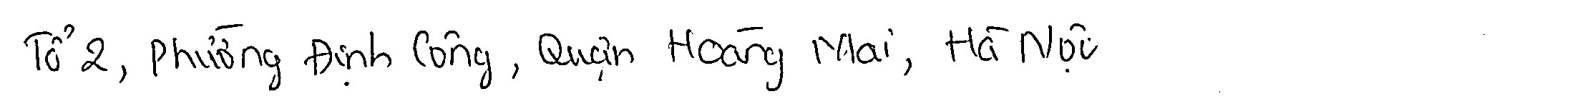

Labeled as: T·ªï 2, Ph∆∞·ªùng ƒê·ªãnh C√¥ng, Qu·∫≠n Ho√†ng Mai, H√† N·ªôi


In [7]:
import pandas as pd
import random
from PIL import Image
import matplotlib.pyplot as plt

# Gi·∫£ s·ª≠ b·∫°n ƒë√£ c√≥ DataFrame df_1 t·ª´ ƒëo·∫°n m√£ tr∆∞·ªõc
# Ch·ªçn m·ªôt h√†ng ng·∫´u nhi√™n t·ª´ DataFrame
random_row = df_1.sample(n=1).iloc[0]

# L·∫•y ƒë∆∞·ªùng d·∫´n file_name
file_path = random_row['file_name']

# M·ªü ·∫£nh
image = Image.open(file_path).convert('RGB')
# Hi·ªÉn th·ªã ·∫£nh
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.axis('off')  # ·∫®n tr·ª•c
plt.show()

# Hi·ªÉn th·ªã nh√£n
print(f"Labeled as: {random_row['label']}")


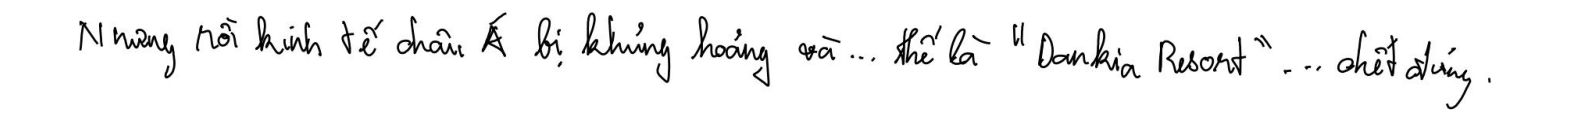

Labeled as: Nh∆∞ng r·ªìi kinh t·∫ø ch√¢u √Å b·ªã kh·ªßng ho·∫£ng v√†... th·∫ø l√† " Dankia Resort "... ch·∫øt ƒë·ª©ng


In [8]:
import pandas as pd
import random
from PIL import Image
import matplotlib.pyplot as plt

# Gi·∫£ s·ª≠ b·∫°n ƒë√£ c√≥ DataFrame df_1 t·ª´ ƒëo·∫°n m√£ tr∆∞·ªõc
# Ch·ªçn m·ªôt h√†ng ng·∫´u nhi√™n t·ª´ DataFrame
random_row = df_2.sample(n=1).iloc[0]

# L·∫•y ƒë∆∞·ªùng d·∫´n file_name
file_path = random_row['file_name']

# M·ªü ·∫£nh
image = Image.open(file_path).convert('RGB')
# Hi·ªÉn th·ªã ·∫£nh
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.axis('off')  # ·∫®n tr·ª•c
plt.show()

# Hi·ªÉn th·ªã nh√£n
print(f"Labeled as: {random_row['label']}")


# Data loader

In [9]:
#conbine 2 df
df = pd.concat([df_1, df_2], ignore_index=True)

In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=config['train_test_split_ratio'])
# we reset the indices to start from zero
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [11]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class VnHandwrittenImagesDataset(Dataset):
    def __init__(self, df, processor, max_target_length=config['max_target_length']):
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # get file name + text
        file_name = self.df['file_name'][idx]
        # Check if 'text' is the correct column name, or if it should be something else, e.g., 'transcription'
        text = self.df['label'][idx] # Replace 'transcription' with the actual column name if it's different
        # prepare image (i.e. resize + normalize)
        image = Image.open(file_name).convert("RGB")
        pixel_values = self.processor(image, return_tensors="pt").pixel_values
        # add labels (input_ids) by encoding the text
        labels = self.processor.tokenizer(text,
                                          padding="max_length",
                                          max_length=self.max_target_length).input_ids
        # important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

# Model

In [21]:
from transformers import TrOCRProcessor
from torch.utils.data import DataLoader
from transformers import VisionEncoderDecoderModel, AutoTokenizer
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
processor = TrOCRProcessor.from_pretrained(config["processor_name"])
model = VisionEncoderDecoderModel.from_pretrained(config["model_name"])
tokenizer = AutoTokenizer.from_pretrained(config["tokenizer_name"])

model.to(device)
train_dataset = VnHandwrittenImagesDataset(df=train_df, processor=processor, max_target_length=config["max_target_length"])
eval_dataset = VnHandwrittenImagesDataset(df=test_df, processor=processor, max_target_length=config["max_target_length"])


train_dataloader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
eval_dataloader = DataLoader(eval_dataset, batch_size=config['batch_size'])

In [22]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))

Number of training examples: 6695
Number of validation examples: 744


In [23]:
model.config.decoder.vocab_size = len(tokenizer)
model.decoder.resize_token_embeddings(len(tokenizer))

model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.eos_token_id = tokenizer.sep_token_id
#Dropout
model.config.dropout = 0.
model.config.max_length = config["max_target_length"]
model.config.early_stopping = config["early_stopping"]
model.config.no_repeat_ngram_size = config["no_repeat_ngram_size"]
model.config.length_penalty = config["length_penalty"]
model.config.num_beams = config["num_beams"]
len(tokenizer)

64001

In [24]:
%pip install evaluate jiwer

In [25]:
import evaluate
cer_metric = evaluate.load("cer")

def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer}

# Train Model

In [26]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="steps",
    per_device_train_batch_size=config["batch_size"],
    per_device_eval_batch_size=config["batch_size"],
    fp16=True,
    output_dir=config["output_dir"],
    logging_steps=config["logging_steps"],
    save_steps=config["save_steps"],
    eval_steps=config["eval_steps"],
    gradient_accumulation_steps=config["gradient_accumulation_steps"],
    learning_rate=config["learning_rate"],
    num_train_epochs=config["num_train_epochs"],
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [28]:
from transformers import default_data_collator
# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.image_processor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)
trainer.train()

OutOfMemoryError: CUDA out of memory. Tried to allocate 16.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 5.06 MiB is free. Process 15026 has 14.74 GiB memory in use. Of the allocated memory 14.23 GiB is allocated by PyTorch, and 380.01 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

# Interface

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained('/content/output/checkpoint-400')
processor = TrOCRProcessor.from_pretrained(config["processor_name"])

# Move model to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-23): 24 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=False)
              (key): Linear(in_features=1024, out_features=1024, bias=False)
              (value): Linear(in_features=1024, out_features=1024, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Line

In [ ]:
def predict_text(image):
    # Process image and move it to the correct device
    pixel_values = processor(image, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    # Generate prediction
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

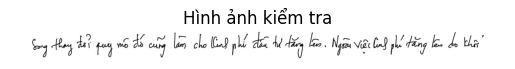

Nh√£n th·ª±c t·∫ø: Song thay qui m√¥ ƒë√≥ c≈©ng l√†m cho kinh ph√≠ ƒë·∫ßu t∆∞ tƒÉng l√™n. Ngo√†i vi·ªác kinh ph√≠ tƒÉng l√™n do kh·ªëi
VƒÉn b·∫£n d·ª± ƒëo√°n: Song thay ƒë·ªïi quy m√≥ ƒë√≥ c·ª©ng l√†m cho l√¨nh ph√≠ ƒë√¢u t·∫ßng l√™n. Ng·ªìu Vi·ªác C√°nh ph√∫ tƒÉng L√™n do kh·ªëi


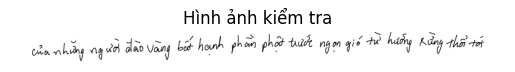

Nh√£n th·ª±c t·∫ø: c·ªßa nh·ªØng ng∆∞·ªùi ƒë√†o v√†ng b·∫•t h·∫°nh ph·∫ßn ph·∫≠t tr∆∞·ªõc ng·ªçn gi√≥ t·ª´ h∆∞·ªõng r·ª´ng th·ªïi t·ªõi
VƒÉn b·∫£n d·ª± ƒëo√°n: c·ªßa nh·ªØng ng∆∞·ªùi ƒëao v√†ng b√°t h·∫°nh ph·∫ßm ph·ªôt tu·ªët ng·ªçi gi√≥ t·ª´ h∆∞∆°ng r·ª±ng th·ªõn t√¥i


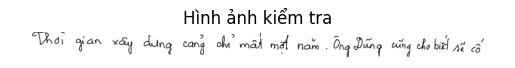

Nh√£n th·ª±c t·∫ø: Th·ªùi gian x√¢y d·ª±ng c·∫£ng ch·ªâ m·∫•t m·ªôt nƒÉm. √îng D≈©ng c≈©ng cho bi·∫øt s·∫Ω c·ªë
VƒÉn b·∫£n d·ª± ƒëo√°n: Th·ªùi gian x√¢y d∆∞ng c·∫£ng ch·ªâ m·∫•t m·ªôt nƒÉm. √îng ƒê√∫ng c≈©ng cho bi·∫øt s·ªë c√≥


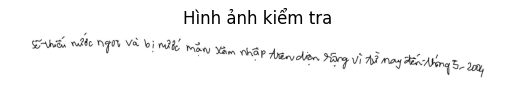

Nh√£n th·ª±c t·∫ø: s·∫Ω thi·∫øu n∆∞·ªõc ng·ªçt v√† b·ªã n∆∞·ªõc m·∫∑n x√¢m nh·∫≠p tr√™n di·ªán r·ªông v√¨ t·ª´ nay ƒë·∫øn th√°ng 5 - 2004
VƒÉn b·∫£n d·ª± ƒëo√°n: ƒëi th·∫øu n∆∞·ªõc ng∆∞i v√† b·ªã n·ªØtc m·∫≠n x√™m nh·ªôp ƒë·∫°n di·ªán r·∫∑ng v√¨ t·ªü may ƒë√°n, NƒÉng 5 - 2004


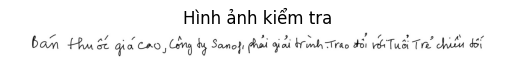

Nh√£n th·ª±c t·∫ø: B√°n thu·ªëc gi√° cao, C√¥ng ty Sanofi ph·∫£i gi·∫£i tr√¨nh. Trao ƒë·ªïi v·ªõi Tu·ªïi Tr·∫ª chi·ªÅu t·ªëi
VƒÉn b·∫£n d·ª± ƒëo√°n: B√°n thu ·ªëc gi√° cao, c√¥ng ty sanoy, ph·∫£i gi·ªùi tr√¨nh. Trao ƒë·ªïi r·ªõi Tu·ªôi Tre chi·∫øu t·ªëi


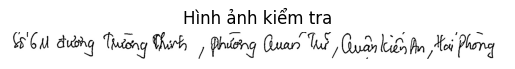

Nh√£n th·ª±c t·∫ø: S·ªë 611 ƒë∆∞·ªùng Tr∆∞·ªùng Chinh, Ph∆∞·ªùng Qu√°n Tr·ªØ, Qu·∫≠n Ki·∫øn An, H·∫£i Ph√≤ng
VƒÉn b·∫£n d·ª± ƒëo√°n: S·ªë 611 ƒë∆∞·ªùng Tr∆∞∆°ng Th√¨nh, Ph∆∞√¥ng Qu√°n Tr·ªß, Qu·∫≠n Ki·∫øn An, Hai Ph√≤ng


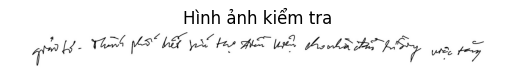

Nh√£n th·ª±c t·∫ø: gi·∫£i t·ªèa. Th√†nh ph·ªë h·∫øt s·ª©c t·∫°o ƒëi·ªÅu ki·ªán cho nh√† ƒë·∫ßu t∆∞ song vi·ªác tƒÉng
VƒÉn b·∫£n d·ª± ƒëo√°n: g·ªãn t∆∞. Th√†nh ph·ªë h·∫øt s·ª©n t·∫°p ƒë·∫ßm ki·ªán cho nh·ªèa ƒë√£n r∆∞√¢ng v·ª±c t·ªØng


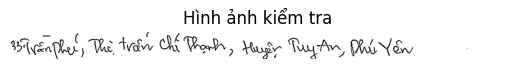

Nh√£n th·ª±c t·∫ø: 33 Tr·∫ßn Ph√∫, Th·ªã tr·∫•n Ch√≠ Th·∫°nh, Huy·ªán Tuy An, Ph√∫ Y√™n
VƒÉn b·∫£n d·ª± ƒëo√°n: 33 Tr·ªÖn Ph·∫ø, Th·ªã Tr·∫•n Ch·ªì Ph·ªánh, Huy·ªôn Tuy An, Ph√∫ Y√™n


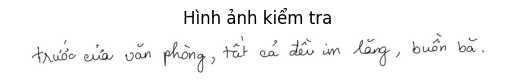

Nh√£n th·ª±c t·∫ø: tr∆∞·ªõc c·ª≠a vƒÉn ph√≤ng, t·∫•t c·∫£ ƒë·ªÅu l·∫∑ng im, bu·ªìn b√£.
VƒÉn b·∫£n d·ª± ƒëo√°n: tr∆∞·ªõc c·ª©a vƒÉn ph√≤ng, t·∫•t c·∫£ ƒë·∫ßu im l·∫øng, bu·ªìn b√°.


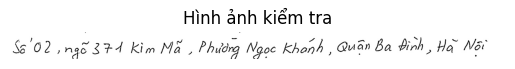

Nh√£n th·ª±c t·∫ø: S·ªë 02, ng√µ 371 Kim M√£, Ph∆∞·ªùng Ng·ªçc Kh√°nh, Qu·∫≠n Ba ƒê√¨nh, H√† N·ªôi
VƒÉn b·∫£n d·ª± ƒëo√°n: S·ªë 02, ng·ªï 37 1 Kim M√†, Ph∆∞·ªùng Ng·ªçc Kh√°nh, Qu·∫≠n Ba ƒê√¨nh, H√† N·ªôi
Th·ªùi gian trung b√¨nh: 5.0341 gi√¢y


In [ ]:
import time
import numpy as np
def measure_time():
    total_time = 0
    num_runs = 10

    for _ in range(num_runs):
        start_time = time.time()
        random_index = np.random.randint(0, len(test_df))
        test_image_name = test_df.iloc[random_index]['file_name']
        test_image_label = test_df.iloc[random_index]['label']

        # ƒê·ªçc v√† hi·ªÉn th·ªã h√¨nh ·∫£nh
        image = Image.open(test_image_name).convert("RGB")
        plt.imshow(image)
        plt.title("H√¨nh ·∫£nh ki·ªÉm tra")
        plt.axis('off')
        plt.show()

        # D·ª± ƒëo√°n vƒÉn b·∫£n t·ª´ h√¨nh ·∫£nh
        predicted_text = predict_text(image)

        # In k·∫øt qu·∫£
        print(f"Nh√£n th·ª±c t·∫ø: {test_image_label}")
        print(f"VƒÉn b·∫£n d·ª± ƒëo√°n: {predicted_text}")

        end_time = time.time()
        total_time += end_time - start_time

    average_time = total_time / num_runs
    print(f"Th·ªùi gian trung b√¨nh: {average_time:.4f} gi√¢y")

# G·ªçi h√†m ƒë·ªÉ ƒëo th·ªùi gian
measure_time()

# **Upload Model**

In [ ]:
!pip install transformers huggingface_hub


In [ ]:
from huggingface_hub import login
login(token="")


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from huggingface_hub import HfApi, HfFolder

api = HfApi()
repo_id = "Daominhwysi/vietnamese-trocr-large-handwritten-v2"

# Upload folder
api.upload_folder(
    folder_path="/content/output/checkpoint-400",
    repo_id=repo_id,
    repo_type="model"
)

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/2.29G [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Daominhwysi/vietnamese-trocr-large-handwritten-v2/commit/6c0c0129ffaeaa2b21bf1f9e4c638ebb770bc302', commit_message='Upload folder using huggingface_hub', commit_description='', oid='6c0c0129ffaeaa2b21bf1f9e4c638ebb770bc302', pr_url=None, pr_revision=None, pr_num=None)